In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/COVID19/owid-covid-data.csv').to_numpy()

In [ ]:
def normalize(data):
    data_new = (data - np.mean(data)) / np.std(data)
    return data_new

In [ ]:
Iran_data_orig = dataset[dataset[:,2] == 'Iran'][:,9]
Iran_data =  Iran_data_orig[Iran_data_orig != 0]
Iran_data_1 = Iran_data[np.logical_and(Iran_data>(np.mean(Iran_data) - 2.5 * np.std(Iran_data)), Iran_data<(np.mean(Iran_data) + 2.5 * np.std(Iran_data)))]
Iran_data_final = np.array(normalize(Iran_data_1))

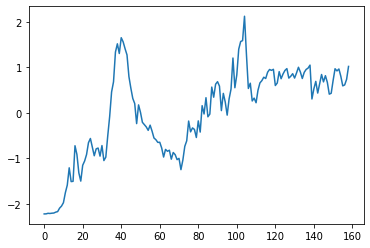

In [ ]:
plt.plot(Iran_data_final)

In [ ]:
dataset1 = pd.read_csv('/content/drive/My Drive/COVID19/multiTimeline 2.csv').to_numpy().T
dataset1 = pd.read_csv('/content/drive/My Drive/COVID19/multiTimeline 2.csv').to_numpy().T


In [ ]:
# def search_result(data):
current_array = dataset1[:,1:][0,:]
search_result = np.array([int(numeric_string) for numeric_string in current_array])
final_search_result = normalize(search_result)
# return final_search_result

159


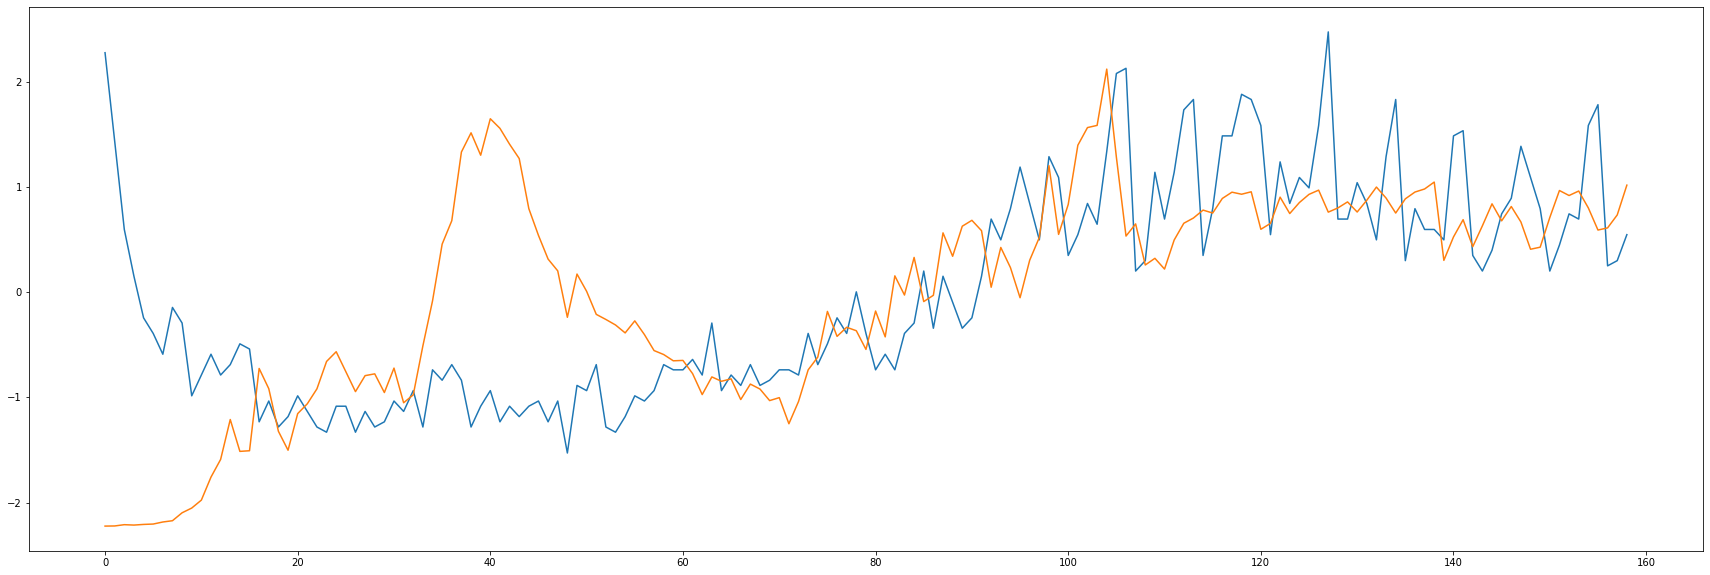

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(final_search_result.astype(float))
plt.plot(Iran_data_final.astype(float))

1 -0.7125815799674888
2 -0.6869115472784946
3 0.11299066260079421
4 0.5850875392384747
5 0.7391916834986272
6 0.6755762541632975
7 0.04066955577801919
8 -0.8495572615382297
9 -0.783315657568269


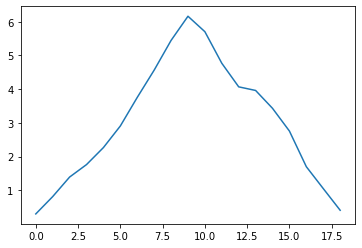

In [ ]:
for i in range(1,10):
    a = np.corrcoef(final_search_result[55-i:-i].astype(float), Iran_data_final[55:].astype(float))
    print(i, a[0,1])
plt.plot(np.correlate(Iran_data_final[55:], final_search_result[49:-6], mode='full'))

# shift = 10
# for i in range(1,shift):
#     # a = np.corrcoef(final_search_result[55-i:-i].astype(float), Iran_data_final[55:].astype(float))
#     a = np.corrcoef(final_search_result[159-shift-i:-i].astype(float), Iran_data_final[159-shift:].astype(float))
#     print(i, a[0,1])
# plt.plot(np.correlate(Iran_data_final[159-shift:], final_search_result[159-shift-5:-5], mode='full'))


In [ ]:
x_train = final_search_result[0:int(0.8*final_search_result.shape[0])].astype(float)
x_test = final_search_result[int(0.8*final_search_result.shape[0]) + 1:].astype(float)
y_train = Iran_data_final[0:int(0.8*Iran_data_final.shape[0])].astype(float)
y_test = Iran_data_final[int(0.8*Iran_data_final.shape[0]) + 1:].astype(float)
print(x_test)

[0.69498605 0.69498605 1.04077035 0.84317932 0.49739502 1.28775913
 1.83113446 0.299804   0.79378156 0.59619054 0.59619054 0.49739502
 1.48535016 1.53474792 0.34920175 0.20100848 0.39859951 0.74438381
 0.89257708 1.38655465 1.09016811 0.79378156 0.20100848 0.44799727
 0.74438381 0.69498605 1.58414567 1.7817367  0.25040624 0.299804
 0.54679278]


In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = y_train.reshape(y_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)


model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print(y_pred.T)
print(y_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# accuracy = metrics.accuracy_score(y_true=y_test.flatten(), y_pred = y_pred.flatten())
    # return accuracy

[[ 0.15973693  0.15973693  0.29280826  0.2167675   0.08369618  0.3878592
   0.59697129  0.00765542  0.19775731  0.12171656  0.12171656  0.08369618
   0.46389996  0.48291015  0.02666561 -0.03036496  0.0456758   0.17874712
   0.23577769  0.42587958  0.31181845  0.19775731 -0.03036496  0.06468599
   0.17874712  0.15973693  0.50192034  0.5779611  -0.01135477  0.00765542
   0.10270637]]
[0.80084097 0.8580195  0.76193915 0.8738457  0.99902582 0.89447081
 0.75223923 0.88722139 0.95164933 0.98074911 1.04640231 0.30246887
 0.52495459 0.68903654 0.43255001 0.63073486 0.83974279 0.67811135
 0.81421666 0.66718617 0.40824914 0.427649   0.70976375 0.96625027
 0.91877168 0.96134926 0.80084097 0.59060779 0.6112329  0.73406462
 1.01730253]
Mean squared error: 0.39
Coefficient of determination: -9.32


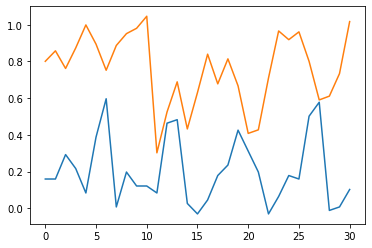

In [ ]:
plt.plot(y_pred)
# plt.plot(final_search_result)
plt.plot(y_test)

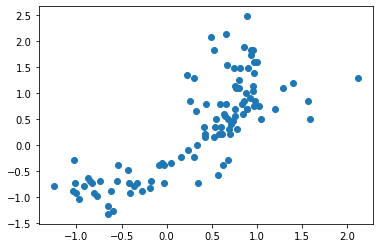

In [ ]:
plt.scatter(Iran_data_final[55:], final_search_result[49:-6])
# plt.plot(Iran_data_final[55:])
# plt.plot(final_search_result[49:-6])